In [1]:
## ----- Imports -----
import sys
sys.path.append('.')
from mylib import *
from sklearn.model_selection import train_test_split, \
cross_val_score



In [2]:
data_ = np.zeros((24, 31, 110))
for config in range(31):
    for roi in range(110):
        _, _, y = get_values(config, roi, 'pre-post')
        data_[:, config, roi] = y

data_ = np.transpose(data_, [1, 0, 2])

In [3]:
data_.shape

(31, 24, 110)

In [8]:
# good_pairs = [(3,26),(3,22),(7,31),(8,26),(8,31),(9,26),(9,27),(9,31),(11,26),
#               (12,26),(13,22),(14,22),(14,23),
#               (15,22),(15,23),(23,21),(24,21),(26,31),(27,31),(28,26),(28,31),
#               (29,26),(29,31),(30,26),(30,27),(30,31)]

rois = [26, 22, 31, 27, 23, 21]
data_ = np.zeros((24, 31, 6))
for config in range(31):
    for iroi, roi in enumerate(rois):
        _, _, y = get_values(config, roi, 'pre-post')
        data_[:, config, iroi] = y

data_ = np.transpose(data_, [1, 0, 2])

In [11]:

good_rois = [26, 22, 31, 27, 23, 21]
data_ = np.zeros((24, 31, 110 - len(good_rois)))
for config in range(31):
    for iroi, roi in enumerate(list(set(range(110)) - set(good_rois))):
        
        _, _, y = get_values(config, roi, 'pre-post')
        data_[:, config, iroi] = y

data_ = np.transpose(data_, [1, 0, 2])

In [27]:
data_.shape

(31, 24, 104)

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assume input tensor: (n_classes, n_samples_per_class, n_features)
X_tensor = np.copy(data_)  # example: 5 classes, 20 samples/class, 50 features

# Step 1: Reshape to (n_samples, n_features)
n_classes, n_samples_per_class, n_features = X_tensor.shape
X = X_tensor.reshape(-1, n_features)

# Step 2: Create labels
y = np.repeat(np.arange(n_classes), n_samples_per_class)

# Step 3: Cross-validation predictions
clf = LogisticRegression(max_iter=10000)
n_splits = 15
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=cv)

# Step 4: Compute confusion matrix
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1 1 0 1 2 0 1 0 1 0 0 2 2 0 2 0 1 0 0 0 1 3 1 0 1 0 2 1 1 0 0]
 [0 0 1 1 2 0 0 1 1 0 2 0 1 2 0 1 0 2 0 0 1 6 0 0 1 0 0 1 0 1 0]
 [0 2 0 1 2 0 1 0 1 0 2 0 0 0 2 2 0 2 0 1 0 3 1 0 0 0 0 0 2 1 1]
 [0 1 2 0 3 1 0 1 0 0 0 0 0 0 5 0 0 4 0 0 1 3 1 0 1 0 0 0 0 1 0]
 [1 1 1 0 2 0 1 0 0 0 1 0 0 1 0 0 0 3 1 2 2 3 0 0 0 1 0 1 1 2 0]
 [0 2 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 3 2 1 0 5 0 1 1 0 0 0 1 0 1]
 [1 1 2 0 2 0 0 2 0 0 1 1 0 1 0 0 1 2 0 1 1 2 0 0 1 0 0 3 1 1 0]
 [0 1 1 3 0 0 2 2 1 0 1 0 1 0 0 0 1 0 0 1 2 3 1 0 0 1 0 0 1 1 1]
 [2 1 1 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 1 2 1 1 0 0 0 0 6 3 0 1]
 [1 2 0 0 1 0 1 1 2 1 2 2 1 0 1 0 0 2 0 1 1 2 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 1 1 1 1 0 2 0 0 0 0 0 3 1 1 0 1 0 4 0 0 3 0 0 1 1 0 1]
 [2 0 1 2 0 0 1 3 0 0 1 0 0 1 0 0 1 2 0 3 1 0 1 0 3 0 0 0 0 1 1]
 [2 2 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 4 4 0 2 0 0 1 0 2 1 0]
 [0 1 0 1 1 0 1 1 2 0 1 0 1 0 0 2 1 1 1 1 1 3 0 1 0 1 0 1 0 2 0]
 [1 1 1 1 0 1 0 1 2 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 2 2 1 2]
 [2 0 1

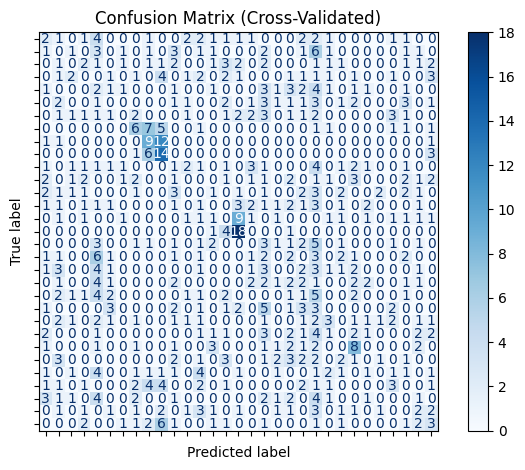

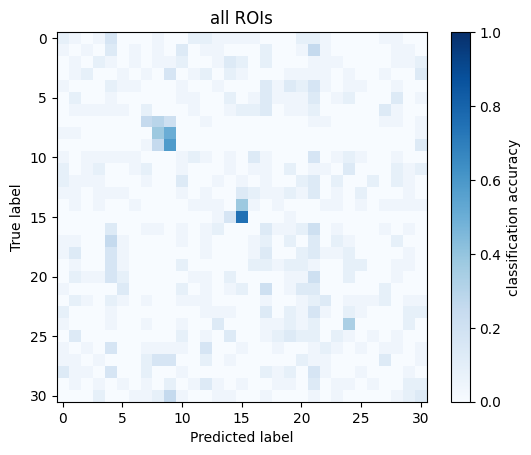

In [7]:
# Plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels='')# np.arange(n_classes))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Cross-Validated)")
plt.tight_layout()
plt.show()


plt.imshow(cm/24, cmap='Blues', clim=(0, 1))
plt.colorbar(label='classification accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('all ROIs')
plt.show()

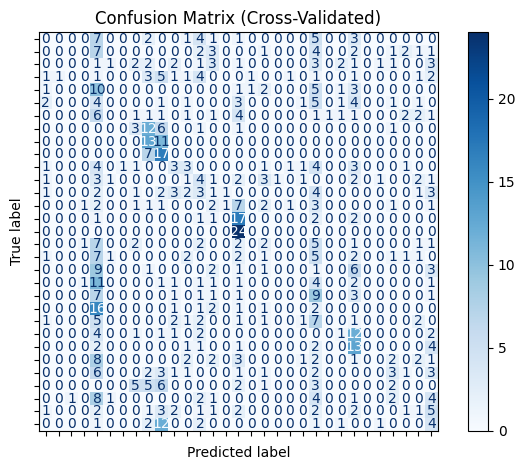

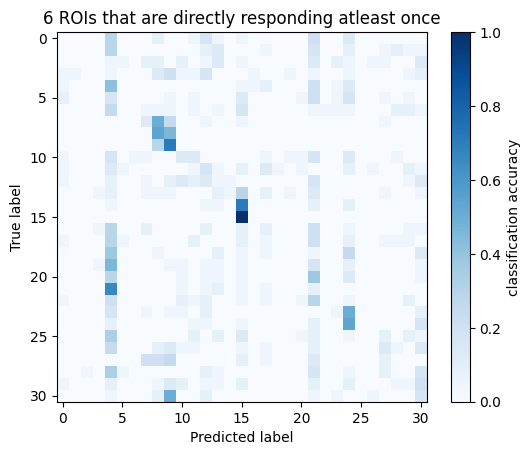

In [10]:
# Plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels='')# np.arange(n_classes))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Cross-Validated)")
plt.tight_layout()
plt.show()


plt.imshow(cm/24, cmap='Blues', clim=(0, 1))
plt.colorbar(label='classification accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('6 ROIs that are directly responding atleast once')
plt.show()

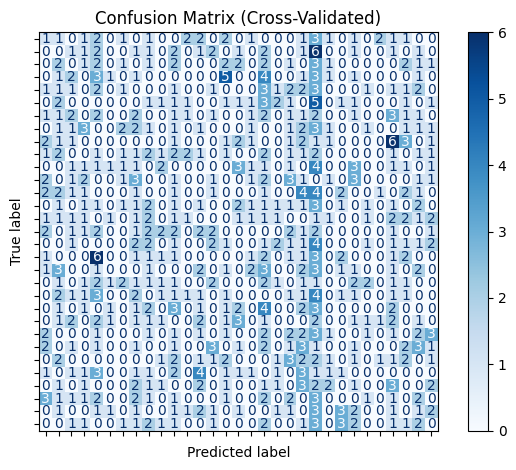

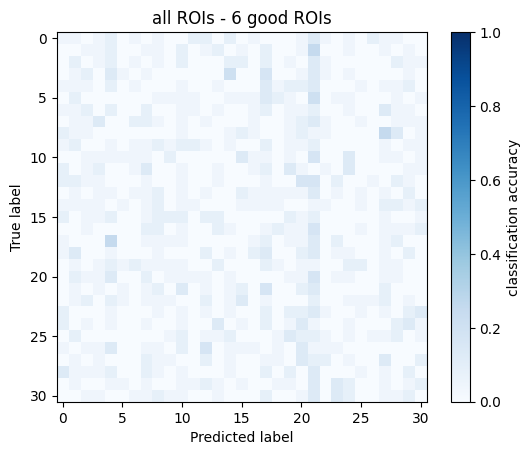

In [13]:
# Plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels='')# np.arange(n_classes))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Cross-Validated)")
plt.tight_layout()
plt.show()


plt.imshow(cm/24, cmap='Blues', clim=(0, 1))
plt.colorbar(label='classification accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('all ROIs - 6 good ROIs')
plt.show()